# Childhood Health - Bullying

School aged children can be subjected to physical, psychological, social, or educational bullying by their peers. The CDC defines bullying as "unwanted aggressive behavior(s) that is repeated multiple times or is highly likely to be repeated" that may inflict harm or distress on the victim [(CDC, Fast Fact: Preventing Bullying 2021)](https://www.cdc.gov/violenceprevention/youthviolence/bullyingresearch/fastfact.html). Although schools have a legal obligation to respond to bullying through federal laws, this is only a reactional approach to the existing bullying. The analysis performed will be focused on classifying the risk associated with children becoming a bully or already showing bully like behaviors. This would allow bullying prevention programs to be put in place at educational institutions to protect the students. The dataset procured for this analysis was sponsored by the Maternal Child Health Bureau of the Health Resources and Services Administration through the [National Survey of Children's Health (NSCH)](https://www.census.gov/programs-surveys/nsch/data/datasets.html). The survey contained 461 features collected to examine the physical and emotional health of children including bullying frequency.

The bully feature categorizes the frequency that the child has bullied others, picked on them, or excluded them in 5 levels including:
* 1 - Never (in the past 12 months)
* 2 - 1-2 times (in the past 12 months)
* 3 - 1-2 times per month
* 4 - 1-2 times per week
* 5 - Almost every day

The model that will be built for this analysis will categorize the risk level of bullying. From this, educational institutions can provide intervention for children that are most likely to engage in frequent bullying of their peers. With the appropriate supports in place, this system could prevent bullying and also support the children who may have become bullies due to circumstances found to have a correlation to the bullying behavior. This type of support system could also indirectly affect future behaviors from these children in other matters.

# Milestone 1

## Data Import

In [1]:
# Load libraries
import pandas as pd
import numpy as np

# Graph libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split

In [2]:
# Read child health survey data
child_health = pd.read_sas('nsch_2021_topical.sas7bdat')

In [213]:
# Validate import
child_health.head()

,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,HHCOUNT_IF,HIGRADE,HIGRADE_TVIS,FPL_I1,FPL_I2,FPL_I3,FPL_I4,FPL_I5,FPL_I6,FWC
0,b'48',b'1',b'21000002',b'T1',2.0,1.0,3.0,2.0,1.0,NaN,...,0.0,3.0,4.0,400.0,400.0,400.0,400.0,400.0,400.0,2068.528102
1,b'02',b'1',b'21000009',b'T3',1.0,2.0,1.0,12.0,1.0,NaN,...,0.0,2.0,2.0,139.0,139.0,139.0,139.0,139.0,139.0,172.907963
2,b'40',b'1',b'21000017',b'T2',2.0,1.0,1.0,8.0,1.0,NaN,...,0.0,3.0,4.0,395.0,395.0,395.0,395.0,395.0,395.0,2169.272128
3,b'26',b'1',b'21000030',b'T1',1.0,1.0,1.0,2.0,2.0,NaN,...,0.0,2.0,2.0,336.0,336.0,336.0,336.0,336.0,336.0,884.196350
4,b'22',b'1',b'21000031',b'T1',3.0,3.0,1.0,5.0,2.0,NaN,...,0.0,2.0,2.0,96.0,96.0,96.0,96.0,96.0,96.0,812.410936


In [226]:
# Check size of data
child_health.shape

(50892, 461)

## Graphs

In [227]:
# Set theme
sns.set_palette("Set2")

### Child Race and Ethnicity

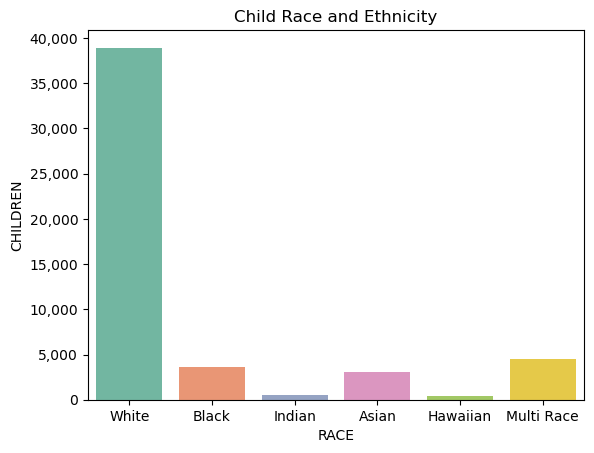

In [4]:
# Determine race distribution of children who participated
ax = sns.countplot(x=child_health["SC_RACE_R"])

# Set title and labels
ax.set(xlabel='RACE', ylabel='CHILDREN',
       title='Child Race and Ethnicity')

# Specify race
ax.set_xticklabels(['White', 'Black', 'Indian', 'Asian', 'Hawaiian', 'Multi Race'])

# Format y axis
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Show plot
plt.show()

The distribution shown above show that the majority of the children who participated in the health survey are white.

### Family Count by Bullied Frequency

In [229]:
# Pivot table to show relationship between Bully and Bullied rating and the number of members inf amily
famcount = pd.pivot_table(child_health, values='FAMCOUNT', index=['BULLIED_R'],
                           columns=['BULLY'])

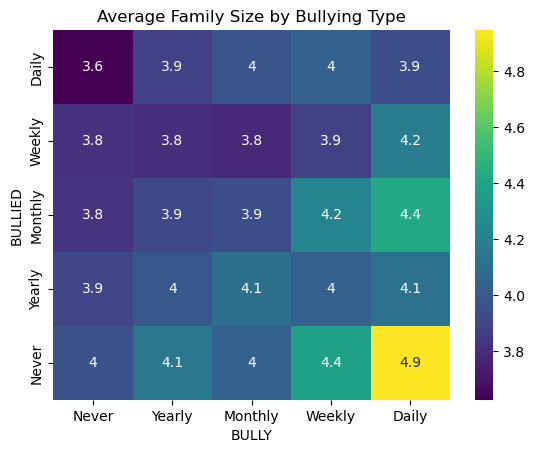

In [230]:
# Show heatmap
ax = sns.heatmap(famcount, annot=True, cmap='viridis')

# Set title and labels
ax.set(xlabel='BULLY', ylabel='BULLIED',
       title='Average Family Size by Bullying Type')

# Set labels for frequency
ax.set_xticklabels(['Never', 'Yearly', 'Monthly', 'Weekly', 'Daily'])
ax.set_yticklabels(['Never', 'Yearly', 'Monthly', 'Weekly', 'Daily'])

# Invert y axis to go from least to greatest
ax.invert_yaxis()

# Show plot
plt.show()

Children who bullies others on a daily basis but are not bullied have the largest family size.

### Child Age by Gender

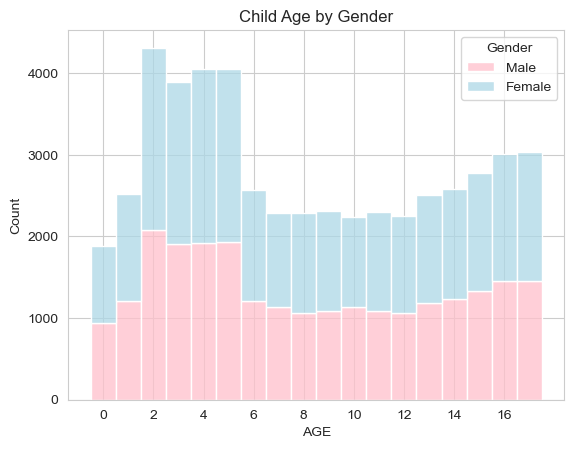

In [346]:
# Plot count of children by age with gender separation
ax = sns.histplot(data=child_health, x='SC_AGE_YEARS', hue='SC_SEX', discrete=True, multiple="stack", palette=['lightblue', 'pink'])

# Set title and labels
ax.set(xlabel='AGE',
       title='Child Age by Gender')

# Configure legend to show gender values
plt.legend(["Male", "Female"], title="Gender") 

# Set x labels to increment by 2 from 0-18
plt.xticks(np.arange(0, 18, 2, dtype=int))

# Show plot
plt.show()

Gender distribution for each year of age appears to be relatively equal.

### Average Bullying Rating by Age

In [246]:
# Calculate average bully and bullied scores by age
age_bully = child_health.groupby('SC_AGE_YEARS')['BULLY'].mean().reset_index()
age_bullied = child_health.groupby('SC_AGE_YEARS')['BULLIED_R'].mean().reset_index()

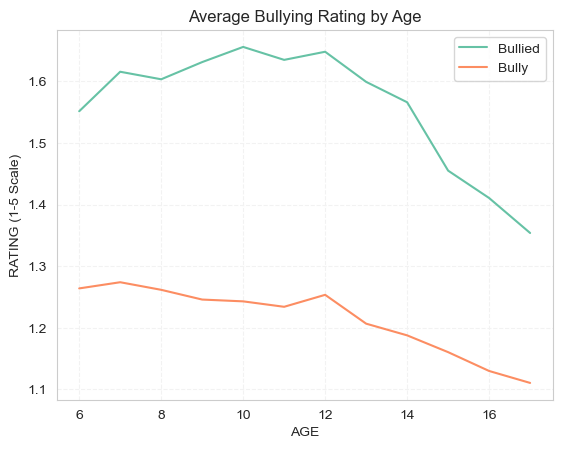

In [347]:
# Create line plot for bully and bullied to compare average by age
# Set title and labels
sns.lineplot(data=age_bullied, x='SC_AGE_YEARS', y='BULLIED_R', label='Bullied').set(
        title='Average Bullying Rating by Age', 
        xlabel='AGE', 
        ylabel='RATING (1-5 Scale)')
sns.lineplot(data=age_bully, x='SC_AGE_YEARS', y='BULLY', label='Bully')

# Show grid lines
plt.grid(axis='both', color='0.95', linestyle='--')

# show legend
plt.legend()

# Show plot
plt.show()

There were no records of bully or bullied from ages 0-5. The highest bully and bullied scores were shown to be from ages 6-12.

### Hard to Cover Basics(Food or Housing) by Bullying Type

In [349]:
# Average Bully Rating by Likelihood of Hard to Cover Basics
low_income = child_health.groupby('ACE1')[['BULLY','BULLIED_R']].mean().reset_index()

In [350]:
# Melt table to get average rating for Bully and Bullied compared to covering basic needs
low_income = pd.melt(low_income, id_vars='ACE1', value_vars=['BULLY','BULLIED_R'],
                var_name='bully_type', value_name='avg_rating')

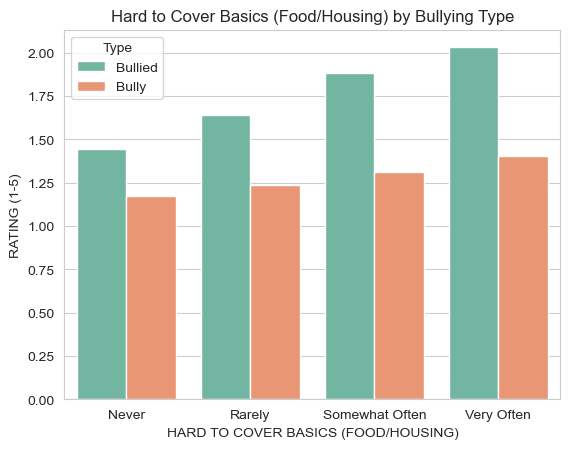

In [353]:
# Create bar plot for each bullying type for each needs not met answer
ax = sns.barplot(data=low_income, x='ACE1', y='avg_rating', hue="bully_type", hue_order=['BULLIED_R','BULLY'])

# Set title and labels
ax.set(xlabel='HARD TO COVER BASICS (FOOD/HOUSING)', ylabel='RATING (1-5)',
       title='Hard to Cover Basics (Food/Housing) by Bullying Type')

# Set labels for frequency
ax.set_xticklabels(['Never', 'Rarely', 'Somewhat Often', 'Very Often'])

# Configure legend
handles, labels = ax.get_legend_handles_labels()
labels = ["Bullied", "Bully"]
ax.legend(handles, labels, title="Type")

# Show plot
plt.show()

As the probability of familes not being able to cover basics with their current income increases, it appears that the bullies and bullied increase as well.

### Graph Insights

Based on the initial graphs, it appears that children who are between the ages of 6-12 are the most likely to be a bully and bullied. There may also be a correlation between families with a larger family size and those who have difficulty cover ingbasic essentials with their current income. The age and gender appear to be evenly distributed, but race appears to skew heavily in children who are white.

# Milestone 2

## Data Cleanup

### Decode objects

In [3]:
# Convert the first 4 columns (byte columns) into strings for processing
child_health.iloc[:,:5] = child_health.iloc[:,:5].stack().str.decode('utf-8').unstack()

### Test 2-3 Features

In [4]:
# Filter out test 1 records as they do not contain the 'BULLY' column that is the target value
child_T2T3 = child_health[child_health['FORMTYPE'] != 'T1']

In [5]:
child_T2T3['FORMTYPE'].value_counts()

T3    16166
T2    14007
Name: FORMTYPE, dtype: int64

In [6]:
row_count = child_T2T3.shape[0]
# Set threshold of missing values (> 99.99% of values) (Test 1 features)
threshold = row_count * .9999

In [7]:
# counter / list
columns = []

# For each column
for x in child_T2T3.columns:
    # Check null count
    if(child_T2T3[x].isnull().sum() > threshold):
        columns.append(x)

# Drop Test 1 features
child_T2T3 = child_T2T3.drop(columns, axis=1)
        
print(len(columns), 'columns did not meet test 2-3 threshold and were dropped.')
print(sorted(columns))

68 columns did not meet test 2-3 threshold and were dropped.
['ASKQUESTION', 'ASKQUESTION2', 'BREASTFEDEND_DAY_S', 'BREASTFEDEND_MO_S', 'BREASTFEDEND_WK_S', 'CALMDOWN', 'CLEAREXP', 'COLOR', 'CONFIDENT', 'COORDINATION', 'COUNTTO', 'DIRECTIONS', 'DIRECTIONS2', 'DISTRACTED', 'FRSTFORMULA_DAY_S', 'FRSTFORMULA_MO_S', 'FRSTFORMULA_WK_S', 'FRSTSOLIDS_DAY_S', 'FRSTSOLIDS_MO_S', 'FRSTSOLIDS_WK_S', 'FRUIT', 'HANDS', 'HOURSLEEP05', 'HURTSAD', 'K6Q08_R', 'K6Q10', 'K6Q12', 'K6Q13A', 'K6Q13B', 'K6Q14A', 'K6Q14B', 'K6Q20', 'K6Q27', 'K6Q40', 'K6Q41R_STILL', 'K6Q42R_NEVER', 'K6Q43R_NEVER', 'K6Q60_R', 'K6Q61_R', 'K6Q70_R', 'K6Q72_R', 'K6Q73_R', 'NEWACTIVITY', 'ONEWORD', 'OUTDOORSWKDAY', 'OUTDOORSWKEND', 'PLAYWELL', 'POINT', 'RECOGABC', 'RECOGBEGIN', 'RECSHAPES', 'RHYMEWORD', 'SIMPLEINST', 'SITSTILL', 'SLEEPPOS', 'STARTSCHOOL', 'SUGARDRINK', 'TELLSTORY', 'TEMPER', 'THREEWORDS', 'TOTKIDS_R', 'TWOWORDS', 'UNDERSTAND', 'UNDERSTAND2', 'USEPENCIL', 'VEGETABLES', 'WORKTOFIN', 'WRITENAME']


In [8]:
# Test 2 & 3 features only
child_T2T3.shape

(30173, 393)

### Drop low value columns

In [9]:
# Set threshold of missing values (> 60% of values)
threshold = row_count * .60

In [10]:
# counter / list
columns = []

# For each column
for x in child_T2T3.columns:
    # Check null count
    if(child_T2T3[x].isnull().sum() > threshold):
        columns.append(x)

# Columns were not dropped because variables listed were considered optional
print(len(columns), 'columns do not meet threshold.')
print(sorted(columns))

112 columns do not meet threshold.
['A1_DEPLSTAT', 'A1_LIVEUSA', 'A2_DEPLSTAT', 'A2_LIVEUSA', 'ADDTREAT', 'ALLERGIES_CURR', 'ALLERGIES_DESC', 'APPOINTMENT', 'ARTHRITIS_CURR', 'ARTHRITIS_DESC', 'AUTISMMED', 'AUTISMTREAT', 'AVAILABLE', 'BESTFORCHILD', 'BLOOD_DESC', 'BLOOD_OTHER', 'BLOOD_SCREEN', 'CERPALS_DESC', 'CONFIRMINJURY', 'CYSTFIB_DESC', 'CYSTFIB_SCREEN', 'DISCUSSOPT', 'GENETIC_DESC', 'GENETIC_SCREEN', 'HCEXTENT', 'HEADACHE_CURR', 'HEADACHE_DESC', 'HEART_BORN', 'HEART_CURR', 'HEART_DESC', 'HEMOPHILIA', 'ISSUECOST', 'K12Q01_A', 'K12Q01_B', 'K12Q01_C', 'K12Q01_D', 'K12Q01_E', 'K12Q01_F', 'K12Q01_G', 'K2Q30B', 'K2Q30C', 'K2Q31B', 'K2Q31C', 'K2Q31D', 'K2Q32B', 'K2Q32C', 'K2Q33B', 'K2Q33C', 'K2Q34B', 'K2Q34C', 'K2Q35A_1_YEARS', 'K2Q35B', 'K2Q35C', 'K2Q35D', 'K2Q36B', 'K2Q36C', 'K2Q37B', 'K2Q37C', 'K2Q38B', 'K2Q38C', 'K2Q40B', 'K2Q40C', 'K2Q41B', 'K2Q41C', 'K2Q42B', 'K2Q42C', 'K2Q60B', 'K2Q60C', 'K2Q61B', 'K4Q26', 'K4Q28X01', 'K4Q28X02', 'K4Q28X03', 'K4Q28X04', 'K4Q28X05', 'K4Q28X_EAR', 

In [11]:
# drop values that do not have value for analysis
# HHID - Unique Household ID
# FORMTYPE - Form Type 2 or 3
# STRATUM - Operational sampling
low_value = ['HHID', 'FORMTYPE','STRATUM']
child_T2T3 = child_T2T3.drop(low_value, axis=1)

In [12]:
# Drop features that are dependent on another question due to signficiant correlation
dep_features = ['A1_DEPLSTAT', 'A2_DEPLSTAT', 'ADDTREAT', 'ALLERGIES_CURR', 'ALLERGIES_DESC', 'APPOINTMENT', 'ARTHRITIS_CURR', 'ARTHRITIS_DESC', 'AUTISMMED', 'AUTISMTREAT', 'AVAILABLE', 
              'BESTFORCHILD', 'BLOOD_DESC', 'BLOOD_OTHER', 'BLOOD_SCREEN', 'CERPALS_DESC', 'CONFIRMINJURY', 'CYSTFIB_DESC', 'CYSTFIB_SCREEN', 'DECISIONS', 'DENTALSERV1', 'DENTALSERV2',
              'DENTALSERV3', 'DENTALSERV4', 'DENTALSERV5', 'DENTALSERV6', 'DENTALSERV7', 'DISCUSSOPT', 'EMOSUPADV', 'EMOSUPFAM', 'EMOSUPHCP', 'EMOSUPMHP', 'EMOSUPOTH', 'EMOSUPPEER', 'EMOSUPSPO',
              'EMOSUPWOR', 'EYECARE1', 'EYECARE2', 'EYECARE3', 'EYECARE4', 'GENETIC_DESC', 'GENETIC_SCREEN', 'HCCOVOTH', 'HCEXTENT', 'HEADACHE_CURR', 'HEADACHE_DESC', 'HEART_BORN', 'HEART_CURR',
              'HEART_DESC', 'HEMOPHILIA', 'ISSUECOST', 'K11Q03R', 'K12Q01_A', 'K12Q01_B', 'K12Q01_C', 'K12Q01_D', 'K12Q01_E', 'K12Q01_F', 'K12Q01_G', 'K12Q03', 'K12Q04', 'K12Q12', 'K2Q30B', 
              'K2Q30C', 'K2Q31B', 'K2Q31C', 'K2Q31D', 'K2Q32B', 'K2Q32C', 'K2Q33B', 'K2Q33C', 'K2Q34B', 'K2Q34C', 'K2Q35A_1_YEARS', 'K2Q35B', 'K2Q35C', 'K2Q35D', 'K2Q36B', 'K2Q36C', 'K2Q37B',
              'K2Q37C', 'K2Q38B', 'K2Q38C', 'K2Q40B', 'K2Q40C', 'K2Q41B', 'K2Q41C', 'K2Q42B', 'K2Q42C', 'K2Q60B', 'K2Q60C', 'K2Q61B', 'K3Q20', 'K3Q21B', 'K3Q22', 'K4Q02_R', 'K4Q26', 'K4Q28X_EAR', 
              'K4Q28X01', 'K4Q28X02', 'K4Q28X03', 'K4Q28X04', 'K4Q28X05', 'K4Q37', 'K4Q38', 'K5Q11', 'K5Q20_R', 'K5Q21', 'K5Q22', 'K5Q30', 'K5Q31_R', 'K5Q32', 'K5Q40', 'K5Q41', 'K5Q42', 'K5Q43',
              'K5Q44', 'KEEPINSADULT', 'MENBEVCOV', 'NOTELIG', 'NOTOPEN', 'PLANNEEDS_R', 'RAISECONC', 'RECEIVECOPY', 'SC_K2Q11', 'SC_K2Q12', 'SC_K2Q14', 'SC_K2Q15', 'SC_K2Q18', 'SC_K2Q20',
              'SC_K2Q21', 'SC_K2Q23', 'SEEKCARE', 'SESCURRSVC', 'SESPLANMO', 'SESPLANYR', 'SICKLECELL', 'SPCSERVMO', 'THALASSEMIA', 'TRANSPORTCC', 'TREATADULT', 'TREATNEED', 'TRICARE', 'USUALSICK',
              'VIDEOPHONECOVID', 'VISIONEXAMREC', 'FPL_I2', 'FPL_I3', 'FPL_I4', 'FPL_I5', 'FPL_I6', 'HIGRADE_TVIS', 'BIRTH_YR', 'LIVEUSA_MO', 'LIVEUSA_YR', 'A1_LIVEUSA', 'A2_LIVEUSA', 
              'SC_AGE_LT10', 'SC_AGE_LT4', 'SC_AGE_LT6', 'SC_AGE_LT9', 'YEAR']
child_T2T3 = child_T2T3.drop(dep_features, axis=1)

### Outliers and Data Type

In [13]:
# counter / list
pot_outliers = []

# For each column
for x in child_T2T3.columns:
    # Check if doesn't meet use case of 1 or 2 as answers
    # Most questions allow 1 or 2 as only answers
    if(child_T2T3[x].min() != 1 and child_T2T3[x].min() != 2):
        pot_outliers.append(x)
  
print(len(pot_outliers), 'columns may hold potential outliers.')
print(sorted(pot_outliers))

24 columns may hold potential outliers.
['A1_AGE', 'A1_GRADE_IF', 'A2_AGE', 'BIRTHWT_OZ_S', 'BIRTH_YR_F', 'FIPSST', 'FPL_I1', 'FPL_IF', 'FWC', 'HHCOUNT_IF', 'K11Q43R', 'MOMAGE', 'SC_AGE_YEARS', 'SC_HISPANIC_R_IF', 'SC_RACE_R_IF', 'SC_SEX_IF', 'TENURE_IF', 'TOTAGE_0_5', 'TOTAGE_12_17', 'TOTAGE_6_11', 'TOTCSHCN', 'TOTFEMALE', 'TOTMALE', 'TOTNONSHCN']


In [14]:
child_T2T3[pot_outliers].describe().T

,count,mean,std,min,25%,50%,75%,max
SC_AGE_YEARS,30173.0,11.783648,3.543931,6.000000,9.00000,12.000000,15.000000,17.000000
MOMAGE,29547.0,29.816733,5.895008,18.000000,26.00000,30.000000,34.000000,45.000000
K11Q43R,29272.0,1.970655,2.117002,0.000000,0.00000,1.000000,3.000000,15.000000
A1_AGE,29231.0,44.560056,8.837214,18.000000,39.00000,44.000000,50.000000,75.000000
A2_AGE,23679.0,44.587102,8.650471,18.000000,39.00000,44.000000,50.000000,75.000000
TOTAGE_0_5,30173.0,0.239950,0.507754,0.000000,0.00000,0.000000,0.000000,3.000000
TOTAGE_6_11,30173.0,0.788818,0.804591,0.000000,0.00000,1.000000,1.000000,4.000000
TOTAGE_12_17,30173.0,0.875849,0.795656,0.000000,0.00000,1.000000,1.000000,4.000000
TOTCSHCN,30173.0,0.454678,0.685189,0.000000,0.00000,0.000000,1.000000,4.000000
TOTNONSHCN,30173.0,1.449939,1.011397,0.000000,1.00000,1.000000,2.000000,4.000000


No outliers were found based on topical variable list.
https://www2.census.gov/programs-surveys/nsch/technical-documentation/codebook/2021-NSCH-Topical-Variable-List.pdf

### Bully (True/False Column)

In [15]:
# Set default to false not a target for bully intervention
child_T2T3 = child_T2T3.assign(BULLY_CAT=0)

In [16]:
# If child bullies once a month or greater, they are a target for intervention
child_T2T3.loc[child_T2T3['BULLY'] >= 3, 'BULLY_CAT'] = 1

In [17]:
child_T2T3['BULLY_CAT'].value_counts()

0    29187
1      986
Name: BULLY_CAT, dtype: int64

In [18]:
# Drop original bully value
child_health_df = child_T2T3.drop('BULLY', axis=1)

In [19]:
columns_to_exclude = ['A1_AGE', 'A2_AGE','BIRTHWT_OZ_S','FAMCOUNT','FIPSST','FPL_I1','FWC','HHCOUNT','K11Q43R',
                      'MOMAGE','SC_AGE_YEARS','TOTAGE_0_5','TOTAGE_12_17','TOTAGE_6_11','TOTCSHCN','TOTFEMALE',
                      'TOTMALE','TOTNONSHCN','STRATUM', 'BULLY_CAT']

In [22]:
# get dummies for categorical columns
ch_df = pd.get_dummies(child_health_df, columns=filter(lambda i: i not in columns_to_exclude,
                 child_health_df.columns))

In [23]:
# Non categorical columns to keep
int_columns = ch_df[ch_df.columns.intersection(columns_to_exclude)].columns.tolist()
# The resulting dummies
dummies = ch_df.iloc[:,390:].columns.tolist()
# Column names to keep
keep = int_columns + dummies

In [24]:
# Filter original columns that dummies did not remove
ch_df = ch_df[[c for c in ch_df.columns if c in keep]]

In [25]:
ch_df = ch_df.fillna(0)

### Test/Train Set

In [26]:
# all columns except bully category
features = ch_df.loc[:, ch_df.columns != 'BULLY_CAT']
# bully category, target for intervention
target = ch_df['BULLY_CAT']

# Split the data 80/20 (train/test)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=1)

In [27]:
target_train.value_counts()

0    23351
1      787
Name: BULLY_CAT, dtype: int64

In [28]:
target_test.value_counts()

0    5836
1     199
Name: BULLY_CAT, dtype: int64

# Milestone 3

## Model Selection

In [31]:
# Model selection libraries
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Model Search
from sklearn.model_selection import GridSearchCV

# Model Type
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Model Validation
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, r2_score

# Warning filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### Step 1: Balance Dataset

Before beginning to setup the pipeline, I used the SMOTE methodology to balance my training dataset as there is a significant difference in records of children that are not bullies instead of performing bully-like behavior.

In [45]:
# Step 1: use SMOTE methodology on training set only
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(features_train,target_train)

### Step 2: Pipeline Setup

In [46]:
# Creating a classifier object to put in my pipeline
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [47]:
# Create a pipeline utilzing min-max scaler
pipe = Pipeline([('scaler', MinMaxScaler(feature_range = (0, 1))), ('classifier', knn)])

### Step 3: Grid Search

In [66]:
# Check performance of several classifiers
search_space = [{"classifier": [KNeighborsClassifier()],
                 "classifier__n_neighbors": range(1,11),
                 "classifier__n_jobs": [-1]},
                {"classifier": [LogisticRegression()],
                 "classifier__solver" : ['liblinear'],
                 "classifier__C": [1, 10, 100, 1000],
                 "classifier__penalty": ['l1', 'l2']}]

In [67]:
# Create grid search with 5 folds using classifiers
# precision and recall should be considered to account for trying to find the true positives
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [68]:
# Fit data to best hyperparameters found
classifier.fit(X_res,y_res)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier',
                                        LogisticRegression(C=1, penalty='l1',
                                                           solver='liblinear'))]),
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_jobs': [-1],
                          'classifier__n_neighbors': range(1, 11)},
                         {'classifier': [LogisticRegression(C=1, penalty='l1',
                                                            solver='liblinear')],
                          'classifier__C': [1, 10, 100, 1000],
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']}])

In [69]:
# Best model parameters
classifier.best_params_

{'classifier': LogisticRegression(C=1, penalty='l1', solver='liblinear'),
 'classifier__C': 1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

### Step 4: Model Evaluation

Based on the grid search function, the logistic regression model provides the best parameters to train the model.

In [53]:
# Create logisitc regression model with hyperparameters found from gridsearchcv
# explain/justify why you are selecting the model(s) and evaluation metric(s) you choose
model = LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [54]:
# Create a pipeline using a min-max scaler
pipe = Pipeline([('scaler', MinMaxScaler(feature_range = (0, 1))), ('classifier', model)])

In [55]:
# Fit SMOTE dataset to chosen model type
pipe.fit(X_res, y_res)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

In [56]:
# Accuracy Score
pipe.score(features_test, target_test)

0.968019884009942

### Step 5: Model Validation

In [57]:
# Predict target based on model
target_predicted = pipe.predict(features_test)

In [58]:
# Print R2 score
# Negative score found which means the model does not perform well
r2_score(target_test, target_predicted)

-0.0029198425299905573

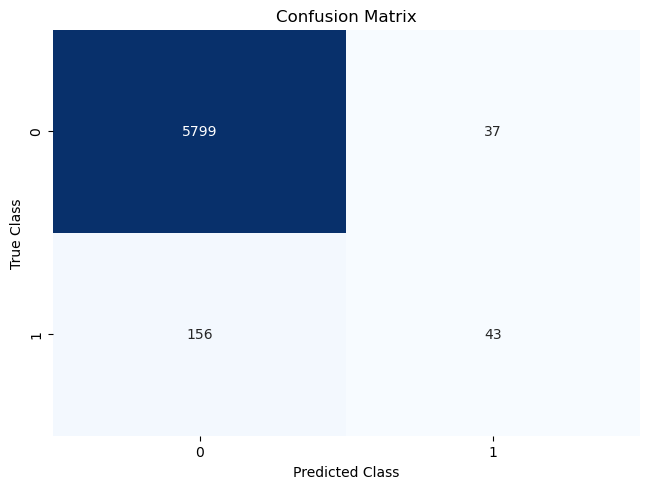

In [59]:
# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)
    
# Plot heatmap of confusion matrix
sns.heatmap(matrix, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [60]:
# Classification Report
# Recall and f1-score is particularly low; however, this model type was the best performing
print(classification_report(target_test, target_predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5836
           1       0.54      0.22      0.31       199

    accuracy                           0.97      6035
   macro avg       0.76      0.60      0.65      6035
weighted avg       0.96      0.97      0.96      6035



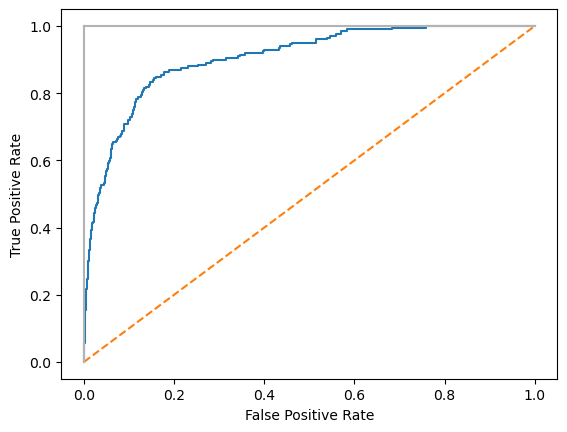

In [61]:
# Calculate probabilities
target_probabilities = pipe.predict_proba(features_test)[:,1]
    
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)
    
# Plot ROC Curve
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Summary of Insights Gained

To predict the bully category (0/1) column, a model was used with the parameters from the T2/T3 test not including any features that have a high correlation to each other. The min-max scaler provides scaling that best represents the skewed categorical column. After conducting a grid search, it was found that the logistic regression model with associated hyperparameters were the best fit for the data. After validation of the model, it was found that it was still a poor model in order to determine the likelihood of a child being a bully. To improve the model additional features would need to be collected that provide more insight into the likelihood of someone becoming a bully. The health data collected about children does not appear to be a good indicator of the bullying behavior.